In [4]:
import pandas as pd

In [6]:
# CSV dosyasını okuma
df = pd.read_csv('data.csv')

In [7]:
# 📅 Tarih verisini düzenleme
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [8]:
# 🧪 Yeni tarihsel değişkenler oluştur
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.day_name()

In [9]:
# 🔍 Eksik değerleri kontrol etme
missing_values = df.isnull().sum()
print("Eksik Değerler:\n", missing_values)

Eksik Değerler:
 Date         0
Longitude    0
Latitude     0
Depth        0
Rms          0
Type         0
Magnitude    0
Location     1
EventID      0
Year         0
Month        0
Day          0
Weekday      0
dtype: int64


In [10]:
# Location da olan Eksik değeri silme
df = df.dropna(subset=['Location'])

In [11]:
# 🧾 Genel bilgi edinme
print("Veri Şekli:", df.shape)
print("Sütunlar:", df.columns.tolist())
print("Tarih Aralığı:", df['Date'].min(), "-", df['Date'].max())
print("Benzersiz Konum Sayısı:", df['Location'].nunique())



Veri Şekli: (2191, 13)
Sütunlar: ['Date', 'Longitude', 'Latitude', 'Depth', 'Rms', 'Type', 'Magnitude', 'Location', 'EventID', 'Year', 'Month', 'Day', 'Weekday']
Tarih Aralığı: 2025-02-22 00:00:00 - 2025-03-22 00:00:00
Benzersiz Konum Sayısı: 768


In [12]:
# İlk 5 satırı görüntüleme
df.head()

,Date,Longitude,Latitude,Depth,Rms,Type,Magnitude,Location,EventID,Year,Month,Day,Weekday
0,2025-03-22,37.9019,38.9464,9.80,0.14,ML,1.1,Hekimhan (Malatya),655723,2025,3,22,Saturday
1,2025-03-22,33.5936,39.5856,1.71,0.24,ML,1.1,Keskin (Kırıkkale),655718,2025,3,22,Saturday
2,2025-03-22,28.6683,35.9147,32.96,0.46,ML,2.2,Akdeniz - [71.04 km] Kaş (Antalya),655721,2025,3,22,Saturday
3,2025-03-22,28.1528,39.4683,10.36,0.44,ML,1.7,Bigadiç (Balıkesir),655720,2025,3,22,Saturday
4,2025-03-22,30.3236,40.5858,6.96,0.19,ML,1.0,Geyve (Sakarya),655719,2025,3,22,Saturday


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

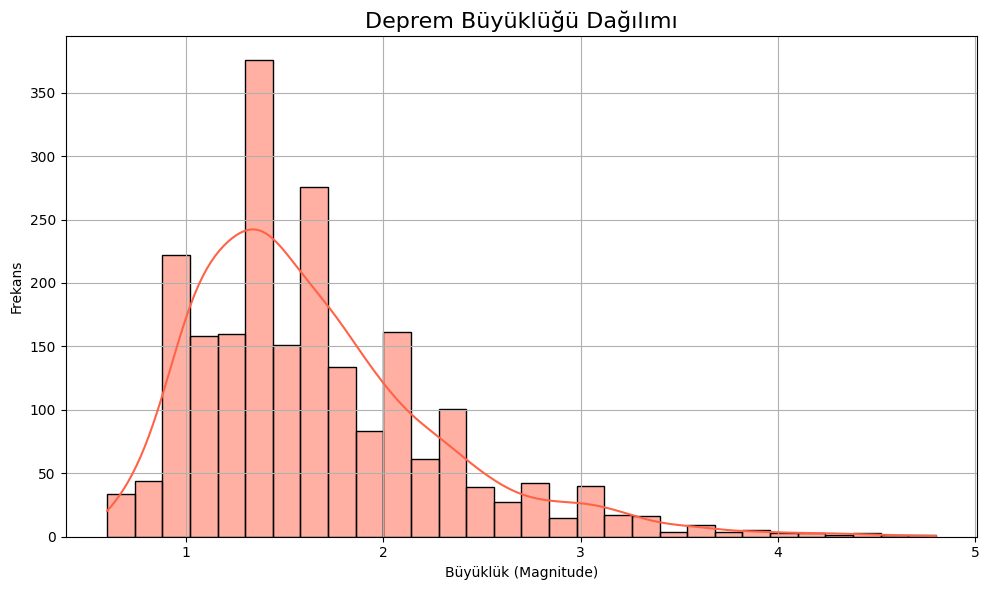

In [14]:
# 1. 📈 Büyüklük Dağılımı
plt.figure(figsize=(10, 6))
sns.histplot(df['Magnitude'], bins=30, kde=True, color="tomato")

plt.title("Deprem Büyüklüğü Dağılımı", fontsize=16)
plt.xlabel("Büyüklük (Magnitude)")
plt.ylabel("Frekans")
plt.grid(True)
plt.tight_layout()
plt.show()

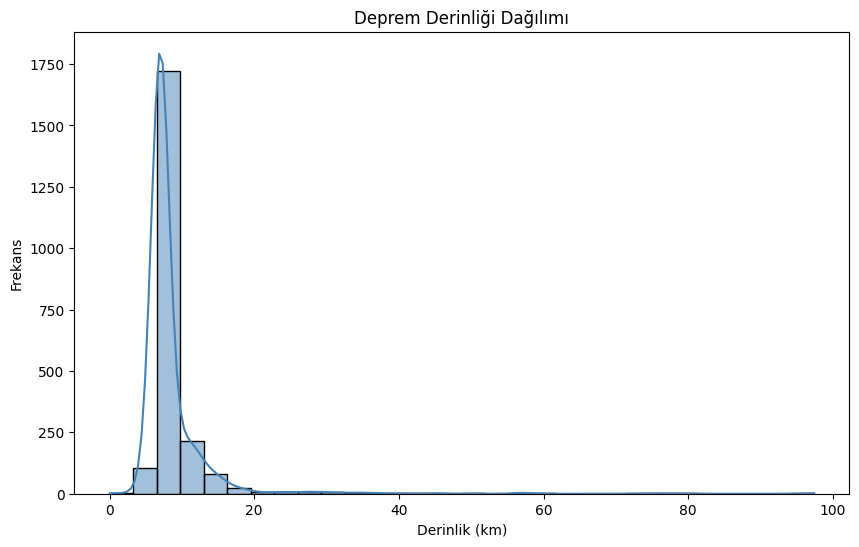

In [15]:
# 2. 📉 Derinlik Dağılımı
plt.figure(figsize=(10, 6))
sns.histplot(df['Depth'], bins=30, kde=True, color="steelblue")
plt.title("Deprem Derinliği Dağılımı")
plt.xlabel("Derinlik (km)")
plt.ylabel("Frekans")
plt.show()

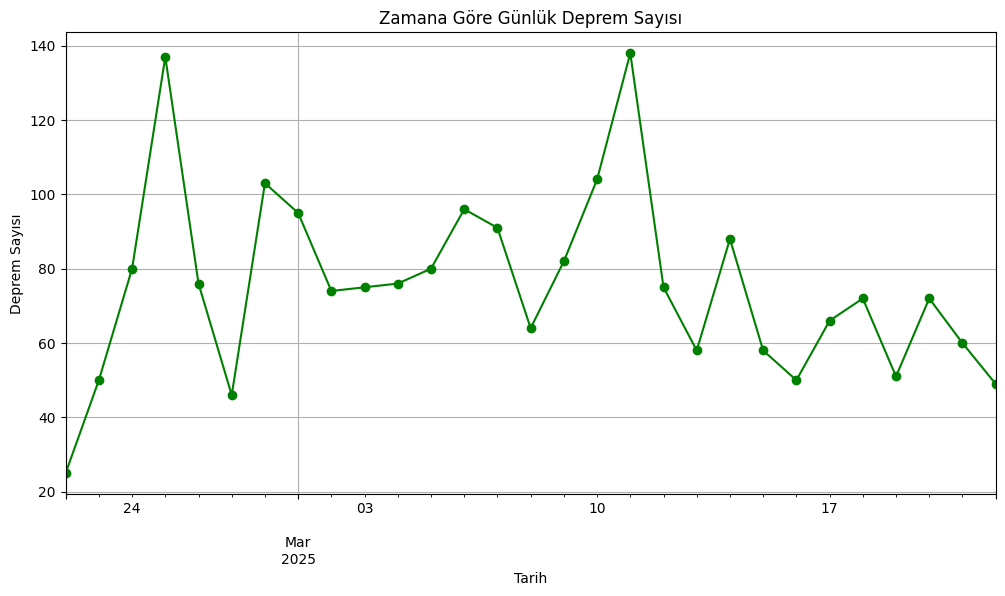

In [16]:
# 3. 📆 Günlük Deprem Sayısı
daily_counts = df['Date'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
daily_counts.plot(kind='line', marker='o', color='green')
plt.title("Zamana Göre Günlük Deprem Sayısı")
plt.xlabel("Tarih")
plt.ylabel("Deprem Sayısı")
plt.grid(True)
plt.show()

<ipython-input-17-7c9788049203>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations.values, y=top_locations.index, palette="rocket")


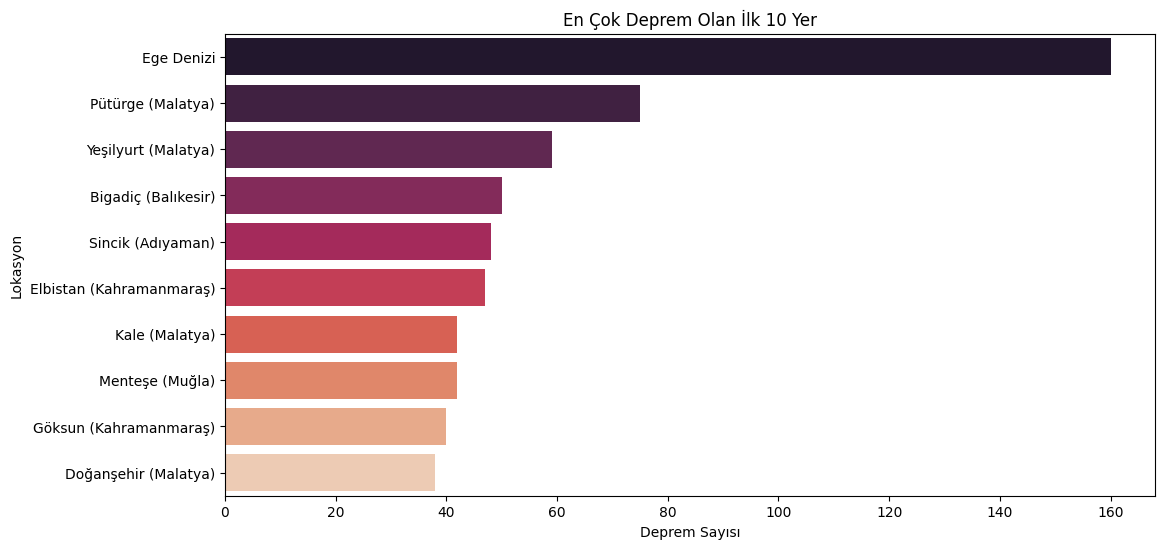

In [17]:
# 4. 🏙️ En Çok Deprem Olan İlk 10 Lokasyon
top_locations = df['Location'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_locations.values, y=top_locations.index, palette="rocket")
plt.title("En Çok Deprem Olan İlk 10 Yer")
plt.xlabel("Deprem Sayısı")
plt.ylabel("Lokasyon")
plt.show()

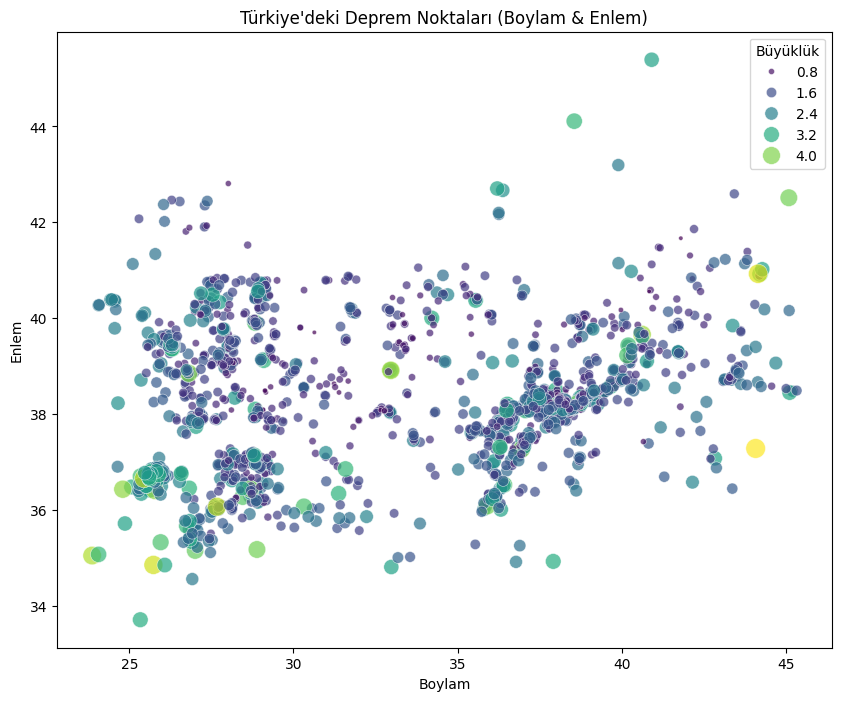

In [18]:
# 5. 🌍 Deprem Noktalarının Harita Üzerinde Gösterimi (scatter plot)
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='Longitude', y='Latitude', size='Magnitude', hue='Magnitude',
                palette='viridis', alpha=0.7, sizes=(10, 200))
plt.title("Türkiye'deki Deprem Noktaları (Boylam & Enlem)")
plt.xlabel("Boylam")
plt.ylabel("Enlem")
plt.legend(title="Büyüklük")
plt.show()

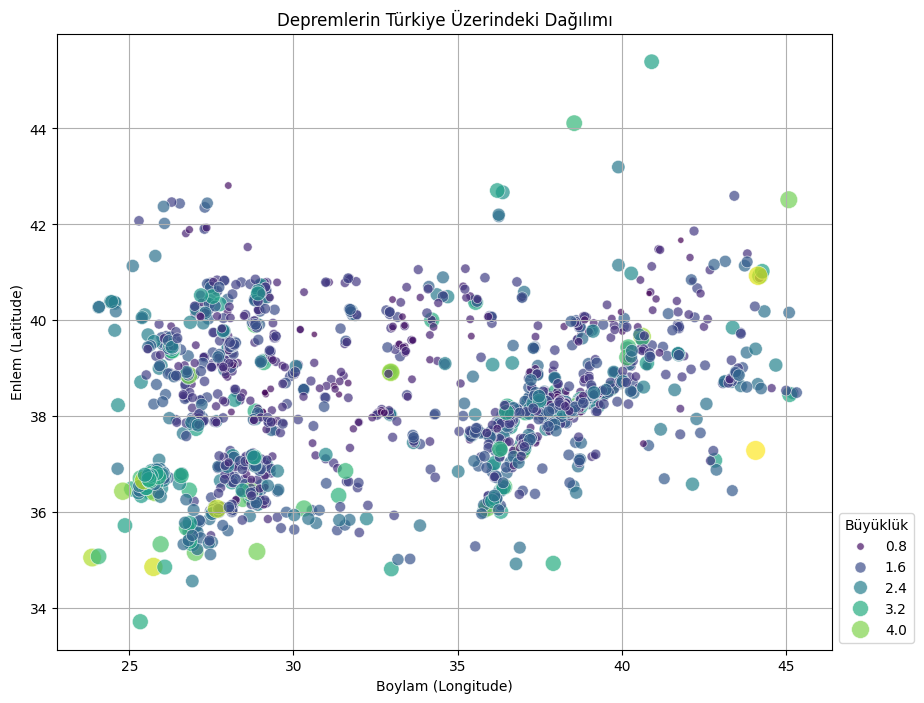

In [19]:
# 🌍 1. Türkiye Haritası Üzerindeki Deprem Noktaları (Enlem-Boylam Dağılım Grafiği)

plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=df,
    x='Longitude',
    y='Latitude',
    hue='Magnitude',
    size='Magnitude',
    palette='viridis',
    alpha=0.7,
    sizes=(20, 200)
)
plt.title("Depremlerin Türkiye Üzerindeki Dağılımı")
plt.xlabel("Boylam (Longitude)")
plt.ylabel("Enlem (Latitude)")
plt.legend(title="Büyüklük", loc='lower left', bbox_to_anchor=(1, 0))
plt.grid(True)
plt.show()


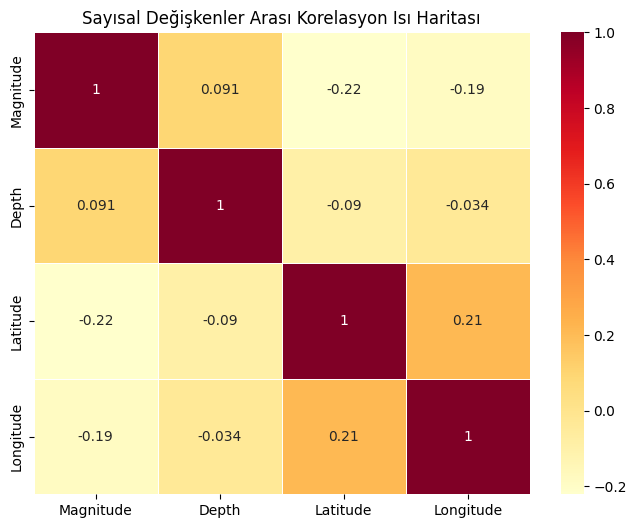

In [20]:
# 🔥 4. Isı Haritası (Korelasyon Isı Haritası)
plt.figure(figsize=(8, 6))
corr = df[['Magnitude', 'Depth', 'Latitude', 'Longitude']].corr()

sns.heatmap(corr, annot=True, cmap="YlOrRd", linewidths=0.5)
plt.title("Sayısal Değişkenler Arası Korelasyon Isı Haritası")
plt.show()



<ipython-input-21-f9fe7fe6d169>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekday_counts.index, y=weekday_counts.values, palette="mako")


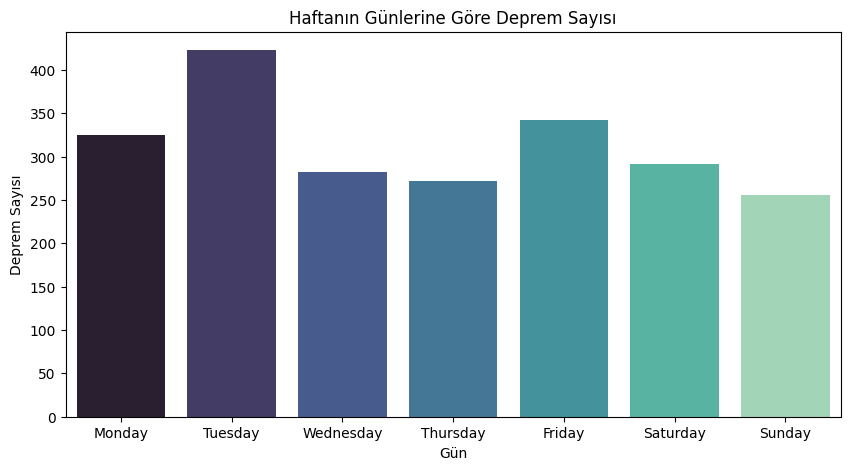

In [21]:
# Haftanın Gününe Göre Deprem Sayısı

weekday_counts = df['Weekday'].value_counts().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

plt.figure(figsize=(10, 5))
sns.barplot(x=weekday_counts.index, y=weekday_counts.values, palette="mako")
plt.title("Haftanın Günlerine Göre Deprem Sayısı")
plt.xlabel("Gün")
plt.ylabel("Deprem Sayısı")
plt.show()


In [22]:
from sklearn.preprocessing import StandardScaler

features = ["Latitude", "Longitude", "Depth", "Magnitude"]
data = df[features].dropna()

scaler = StandardScaler()
scaled_features = scaler.fit_transform(data)


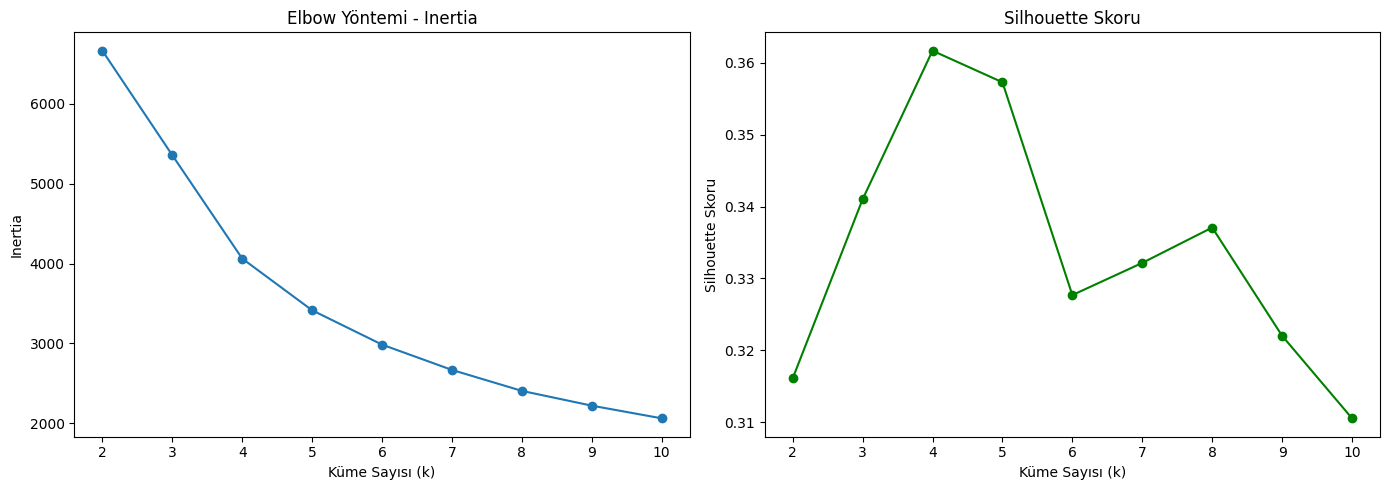

In [23]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

k_values = range(2, 11)
inertia = []
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_features, kmeans.labels_))

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Yöntemi - Inertia')
plt.xlabel('Küme Sayısı (k)')
plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o', color='green')
plt.title('Silhouette Skoru')
plt.xlabel('Küme Sayısı (k)')
plt.ylabel('Silhouette Skoru')

plt.tight_layout()
plt.show()


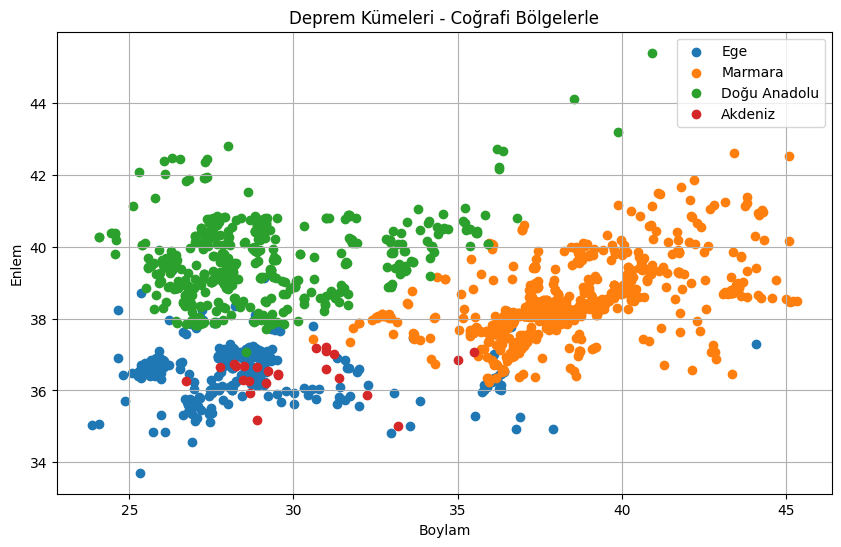


Küme Özeti:

   Latitude  Longitude  Cluster        Region
0   38.9464    37.9019        1       Marmara
1   39.5856    33.5936        2  Doğu Anadolu
2   35.9147    28.6683        3       Akdeniz
3   39.4683    28.1528        2  Doğu Anadolu
4   40.5858    30.3236        2  Doğu Anadolu


In [31]:
# Deprem Kümelemesi - KMeans

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Seçilen k değeri ile modeli kurma (ornegin k=4)
k = 4  # Elbow/Silhouette grafiğine göre güncelleyebilirsin
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(scaled_features)

# Sonuçları veriye ekle
df['Cluster'] = clusters


# Küme numaralarına coğrafi isimler eşleştir (sen kendi verine göre değiştirebilirsin)
region_names = {
    0: "Ege",
    1: "Marmara",
    2: "Doğu Anadolu",
    3: "Akdeniz"
}

# Görselleştirme
plt.figure(figsize=(10, 6))
for i in range(k):
    plt.scatter(
        df[df['Cluster'] == i]['Longitude'],
        df[df['Cluster'] == i]['Latitude'],
        label=region_names.get(i, f'Küme {i}')
    )

plt.xlabel('Boylam')
plt.ylabel('Enlem')
plt.title('Deprem Kümeleri - Coğrafi Bölgelerle')
plt.legend()
plt.grid(True)
plt.show()

# Küme isimlerini ana dataframe'e ekle
df['Region'] = df['Cluster'].map(region_names)

# Küme özet istatistikleri (isteğe bağlı)
print("\nKüme Özeti:\n")
print(df[['Latitude', 'Longitude', 'Cluster', 'Region']].head())
